# Dogs vs Cats

Ce notebook utilise 3 approches différentes pour l'entrainement :
 - From scratch avec les images basiques
 - From scratch avec image augmentation
 - En réutilisant le modèle pré entrainé VGG16

Chaque approche sera expliquée au fur et à mesure du code avec un graphique de l'accuracy du modèle

Source kaggle dogs vs cats : https://www.kaggle.com/c/dogs-vs-cats

Source de téléchargement du dataset : https://www.microsoft.com/en-us/download/details.aspx?id=54765

Github du projet : https://github.com/EDequidt/tp_image_deeplearningynov

In [1]:
import os, shutil

#setup des dossiers pour la gestion des données du dataset
original_dataset_dir = 'C:/Users/Azelnoo/Documents/GitHub/data/dogsvscats'

base_dir = 'C:/Users/Azelnoo/Documents/GitHub/data/small_dogsvscats'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir= os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

print("done")

done


Création des différents dossiers qui contiendrons les images et aideront à organiser la gestion des données 

J'ai copié les 2000 premières images de chaque animal pour faire un dataset plus petit pour nos tests, 
elles ont été divisées entre l'entrainement, la validation et les tests (1000, 500 et 500)

In [2]:
#Combien d'images nous avons ?
print("total training cat images:", len(os.listdir(train_cats_dir)))
print("total training dog images:", len(os.listdir(train_dogs_dir)))
print("total testing cat images:", len(os.listdir(test_cats_dir)))
print("total testing dog images:", len(os.listdir(test_dogs_dir)))
print("total validation cat images:", len(os.listdir(validation_cats_dir)))
print("total validation dog images:", len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total testing cat images: 500
total testing dog images: 500
total validation cat images: 500
total validation dog images: 500


# Modèle "from scratch"

Création d'un modèle que nous allons entrainer sur les images du dataset

In [3]:
from keras import layers
from keras import models

#Définition du modèle

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

J'utilise la librairie keras pour construire rapidement et simplement ce modèle "from scratch"
Création d'un modèle séquenciel classique avec plusieurs couches de conv2d et maxpooling se succédants pour finir sur un flatten et Dense.

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Les chiens et les chats sont définis de façon binaire par 0 ou 1, on utilise donc la "binary_crossentropy" avec pour mesure la précision (accuracy) du modèle

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Pré processing des images pour les rendre lisible par notre modèle. Les images sont abitrairement amenées à une résolution de 150 x 150 et un rescale des valeurs de couleurs allant de 0 à 255 pour les mettre entre 0 et 1

In [6]:
for data_batch, label_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', label_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [7]:
history = model.fit_generator(
    train_generator,
    verbose=1,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 29s 287ms/step - loss: 0.6901 - acc: 0.5485 - val_loss: 0.6727 - val_acc: 0.5310
Epoch 2/30
100/100 [==============================] - 25s 248ms/step - loss: 0.6591 - acc: 0.5960 - val_loss: 0.7581 - val_acc: 0.5010
Epoch 3/30
100/100 [==============================] - 25s 254ms/step - loss: 0.6215 - acc: 0.6575 - val_loss: 0.5818 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 26s 261ms/step - loss: 0.5848 - acc: 0.6800 - val_loss: 0.5772 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 25s 254ms/step - loss: 0.5510 - acc: 0.7155 - val_loss: 0.5555 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 25s 249ms/step - loss: 0.5272 - acc: 0.7445 - val_loss: 0.5371 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 25s 251ms/step - loss: 0.5029 - acc: 0.7575 - val_loss: 0.5759 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 2

Entrainement du modèle en 30 epochs, l'entrainement a duré environ 15min

In [8]:
model.save('cats_and_dogs_small_2.h5')

Sauvegarde du modèle, le fichier est disponible sur le github dont le lien est au début de ce notebook si besoin

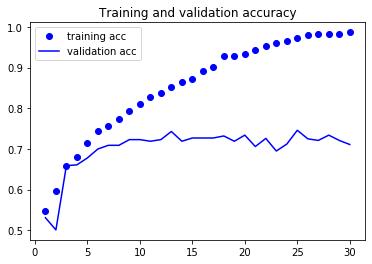

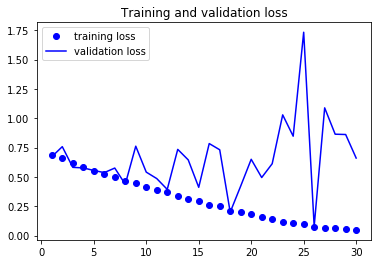

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc,'bo', label='training acc')
plt.plot(epochs, val_acc,'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='training loss')
plt.plot(epochs, val_loss,'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Les performances après l'utilisation de notre modèle sont assez moyenne avec environ 72% d'accuracy qui sont atteints après seulement 6-7 epochs, pour les 23 restantes la précision reste assez linéaire sur le jeu de validation et dénote un overfitting assez conséquent.

Pour tenter de remédier à ça nous allons appliquer de la "data augmentation" ou ici "image augmentation" pour légèrement modifier les images à chaque fois ce qui va obliger le modèle à ne jamais voir deux fois la même image

# Image augmentation

In [11]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' )

Création du générateur d'image avec différents parametres pour définir à quel point on souhaite modifier l'image d'origine ou pas. Dans notre cas ou ne souhaite pas la modifier énormément, simplement la tourner légèrement ou la "mettre en miroir" pour que essayer d'obliger le modèle à ne détecter que le chat et pas son environnement

Voir les images ci dessous

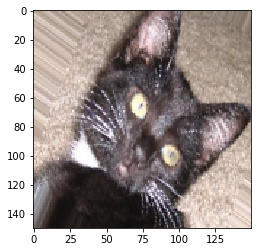

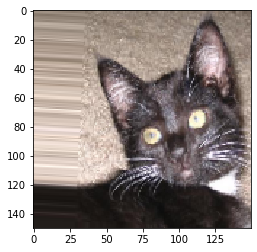

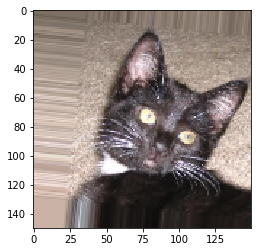

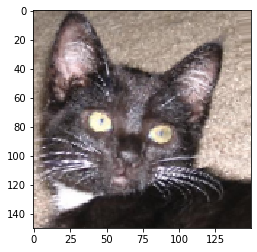

In [15]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

img_path = fnames[5]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i+1
    if i % 4 == 0:
        break
    
plt.show()

In [17]:
#Même modèle qu'avant mais avec l'ajout du dropout 0.5

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

Pour tenter de réduire l'overfitting on ajoute une couche "dropout(0.5)" pour obliger certains neurones à "oublier" ce qu'ils ont appris pour ne pas qu'ils se reposent trop sur leurs acquis

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6942 - acc: 0.5173 - val_loss: 0.6882 - val_acc: 0.5102
Epoch 2/100
100/100 [==============================] - 39s 390ms/step - loss: 0.6860 - acc: 0.5458 - val_loss: 0.6846 - val_acc: 0.5999
Epoch 3/100
100/100 [==============================] - 38s 385ms/step - loss: 0.6728 - acc: 0.5744 - val_loss: 0.6430 - val_acc: 0.5939
Epoch 4/100
100/100 [==============================] - 39s 390ms/step - loss: 0.6623 - acc: 0.6012 - val_loss: 0.6175 - val_acc: 0.5812
Epoch 5/100
100/100 [==============================] - 39s 387ms/step - loss: 0.6484 - acc: 0.6115 - val_loss: 0.8090 - val_acc: 0.5755
Epoch 6/100
100/100 [==============================] - 38s 381ms/step - loss: 0.6306 - acc: 0.6370 - val_loss: 0.7628 - val_acc: 0.5606
Epoch 7/100
100/100 [==============================] - 38s 377ms/step - loss: 0.6157 - acc: 0.6608 -

100/100 [==============================] - 37s 375ms/step - loss: 0.4079 - acc: 0.8141 - val_loss: 0.2552 - val_acc: 0.7893
Epoch 61/100
100/100 [==============================] - 38s 376ms/step - loss: 0.3987 - acc: 0.8172 - val_loss: 0.8254 - val_acc: 0.7848
Epoch 62/100
100/100 [==============================] - 37s 375ms/step - loss: 0.4078 - acc: 0.8065 - val_loss: 0.5632 - val_acc: 0.7468
Epoch 63/100
100/100 [==============================] - 37s 374ms/step - loss: 0.3918 - acc: 0.8213 - val_loss: 0.6477 - val_acc: 0.7590
Epoch 64/100
100/100 [==============================] - 37s 374ms/step - loss: 0.4091 - acc: 0.8106 - val_loss: 0.3290 - val_acc: 0.8035
Epoch 65/100
100/100 [==============================] - 37s 374ms/step - loss: 0.3768 - acc: 0.8318 - val_loss: 0.2772 - val_acc: 0.8014
Epoch 66/100
100/100 [==============================] - 38s 377ms/step - loss: 0.3890 - acc: 0.8261 - val_loss: 0.5771 - val_acc: 0.7945
Epoch 67/100
100/100 [==============================] 

On utilise notre data generator pour "augmenter" les images sur les données de test et de train (mais pas sur la validation) à chaque epoch les images fournies seront légèrement différentes ce qui permettra un meilleur entrainement

L'entrainement a duré environ 1h

In [25]:
model.save('cats_and_dogs_small2.h5')

Fichier disponible sur github

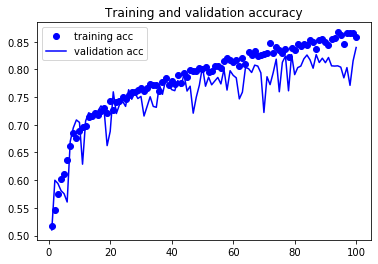

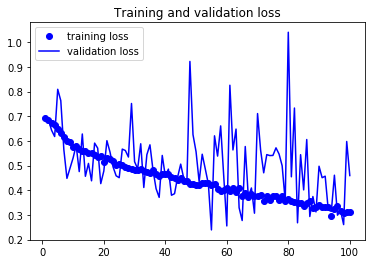

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc,'bo', label='training acc')
plt.plot(epochs, val_acc,'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='training loss')
plt.plot(epochs, val_loss,'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Les performances ont en effet été améliorées on remarque que même sur les données de test l'accuracy n'atteins jamais 100%, le dropout de 0.5 est donc peut être un peu trop élevé.

Sur les données de validation, on atteins environ 81% de précision ce qui est une amélioration relative de 16% par rapport à l'ancien modèle (ou 11 points de %)

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def f(x):
    return np.round(x)

In [31]:
Y_pred = model.predict(validation_generator)
f2 = np.vectorize(f)
y_pred= f2(Y_pred)

print("Confusion Matrix")
print(confusion_matrix(validation_generator.classes, y_pred))
print("classification report")
target_names = ['Dogs','Cats']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[238 262]
 [234 266]]
classification report
              precision    recall  f1-score   support

        Dogs       0.50      0.48      0.49       500
        Cats       0.50      0.53      0.52       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



# Modèle réutilisant le modèle pré entrainé VGG16

In [32]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

conv_base.summary()

58892288/58889256 [==============================] - 89s 2us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________________________________

Récupération du modèle vgg16 et affichage du résumé du modèle

In [40]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i = i+1
        if i * batch_size>= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Définition d'une fonction d'extraction des features de vgg16 (ci-dessus), nous allons utiliser la fonction predict pour extraire les features des images que nous allons fournir à un nouveau modèle (voir ci-dessous)

In [43]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [49]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    verbose=1,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 849us/step - loss: 0.6068 - acc: 0.6780 - val_loss: 0.4256 - val_acc: 0.8400
Epoch 2/30
2000/2000 [==============================] - 2s 785us/step - loss: 0.4213 - acc: 0.8110 - val_loss: 0.3433 - val_acc: 0.8780
Epoch 3/30
2000/2000 [==============================] - 2s 787us/step - loss: 0.3479 - acc: 0.8570 - val_loss: 0.3060 - val_acc: 0.8870
Epoch 4/30
2000/2000 [==============================] - 2s 799us/step - loss: 0.3034 - acc: 0.8730 - val_loss: 0.2859 - val_acc: 0.8900
Epoch 5/30
2000/2000 [==============================] - 2s 788us/step - loss: 0.2814 - acc: 0.8800 - val_loss: 0.2770 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 2s 807us/step - loss: 0.2601 - acc: 0.8970 - val_loss: 0.2648 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 2s 815us/step - loss: 0.2409 - acc: 0.9120 - val_loss: 0.2555 - val_acc: 0.8990


Le modèle étant déjà pré entrainé, le nouvel entrainement est beaucoup plus court que les précédents. Nous l'entrainons sur les features que nous avons extraites précédemment (train_features et train_labels)

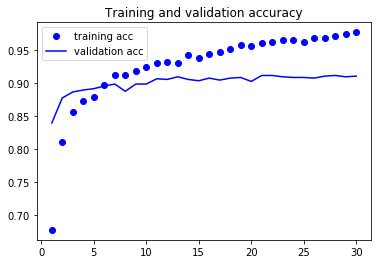

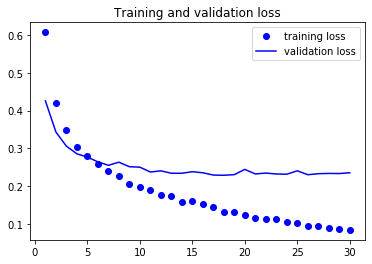

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc,'bo', label='training acc')
plt.plot(epochs, val_acc,'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='training loss')
plt.plot(epochs, val_loss,'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Nous atteignons ici une accuracy de 91% ce qui est encore une fois une nette augmentation.

Pour tenter d'améliorer encore les performances j'ai plusieurs pistes de solutions :

Faire de l'augmentation d'image sur le predict de la feature extraction permettrait de limiter encore l'overfitting

Il serais aussi intéréssant d'utiliser le fine tuning en plus de la feature extraction après avoir "gelé" le vgg16

La modification de certains parametres comme le dropout pourraient aussi aider à améliorer les performances. Cependant ce ne serais pas forcément la chose la plus impactante par rapport à ce qui a été cité précédemment.

Et enfin le modèle sera sans doute plus performant sur de nouvelles images si on essaye de l'entrainer sur la totalité des données e